In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

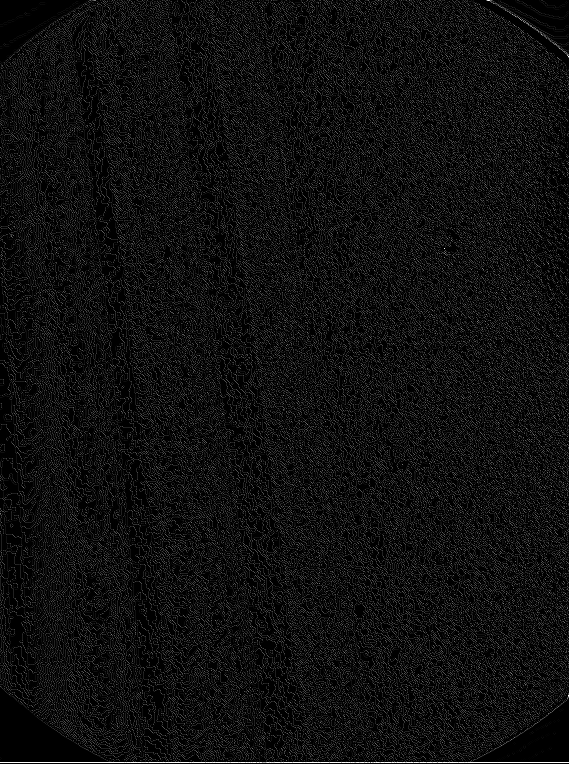

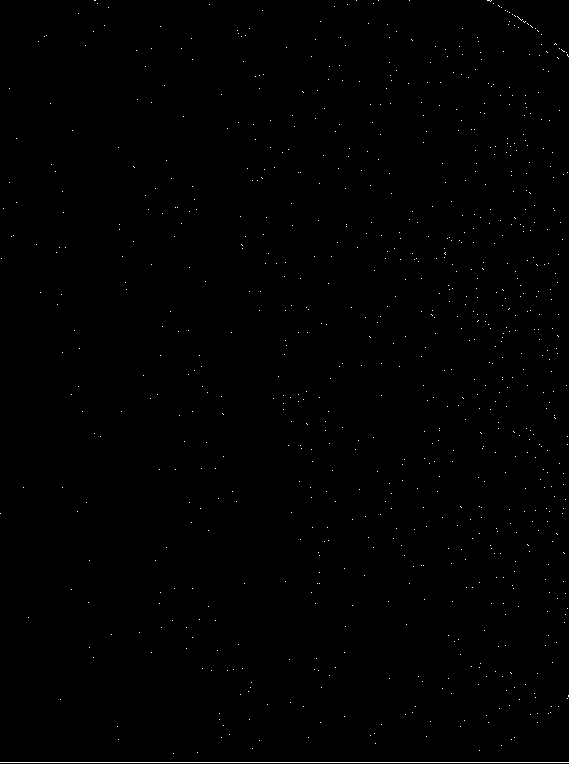

In [ ]:
img=cv2.imread("/content/point_image.bmp",0)
laplacian=cv2.Laplacian(img,cv2.CV_64F)
thresh=100
point=cv2.threshold(laplacian,thresh,255,cv2.THRESH_BINARY)[1]
cv2_imshow(laplacian)
cv2_imshow(point)

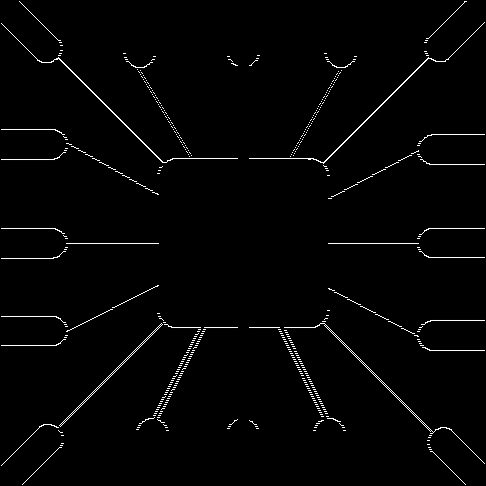

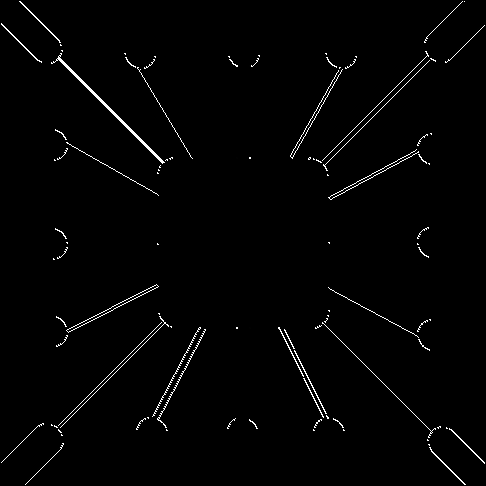

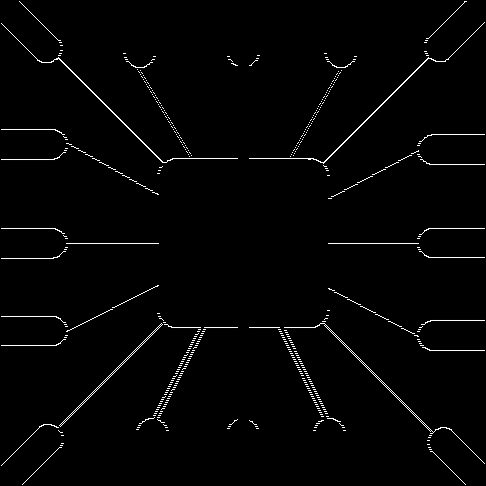

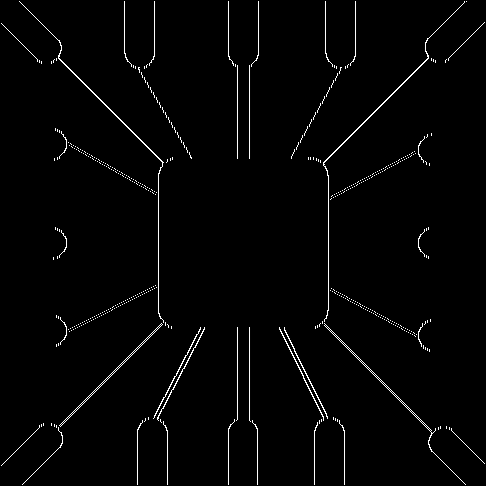

In [ ]:
img=cv2.imread("/content/TE2.bmp",0)
kernel=np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
r=np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
h=np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
v=np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

m,n=img.shape
x,y=kernel.shape

ori=np.zeros((m,n),dtype=np.uint8)

rot=np.zeros((m,n),dtype=np.uint8)

hor=np.zeros((m,n),dtype=np.uint8)

ver=np.zeros((m,n),dtype=np.uint8)

for i in range(1,m-1):
  for j in range(1,n-1):
    sum_ori=0;
    for k in range(-1,x-1):
      for l in range(-1,y-1):
        sum_ori+=img[i+k,j+l]*kernel[k+1,l+1]
    ori[i,j]=sum_ori

    sum_rot=0;
    for k in range(-1,x-1):
      for l in range(-1,y-1):
        sum_rot+=img[i+k,j+l]*r[k+1,l+1]
    rot[i,j]=sum_rot

    sum_h=0;
    for k in range(-1,x-1):
      for l in range(-1,y-1):
        sum_h+=img[i+k,j+l]*h[k+1,l+1]
    hor[i,j]=sum_h

    sum_v=0;
    for k in range(-1,x-1):
      for l in range(-1,y-1):
        sum_v+=img[i+k,j+l]*v[k+1,l+1]
    ver[i,j]=sum_v

cv2_imshow(ori)
cv2_imshow(rot)
cv2_imshow(hor)
cv2_imshow(ver)

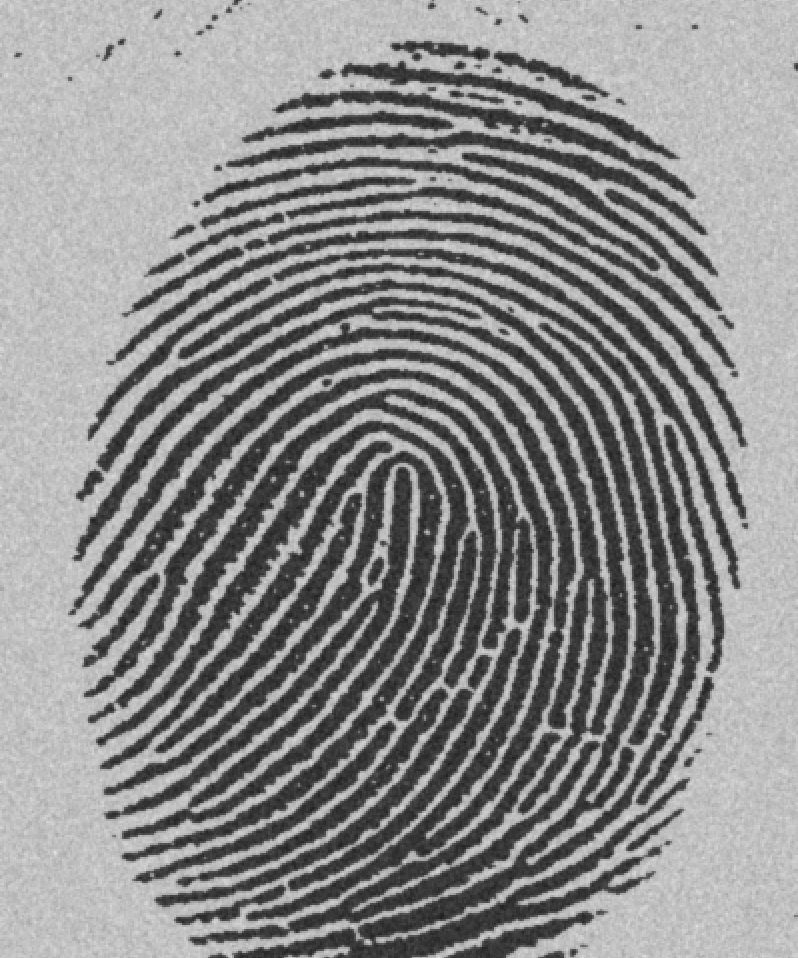

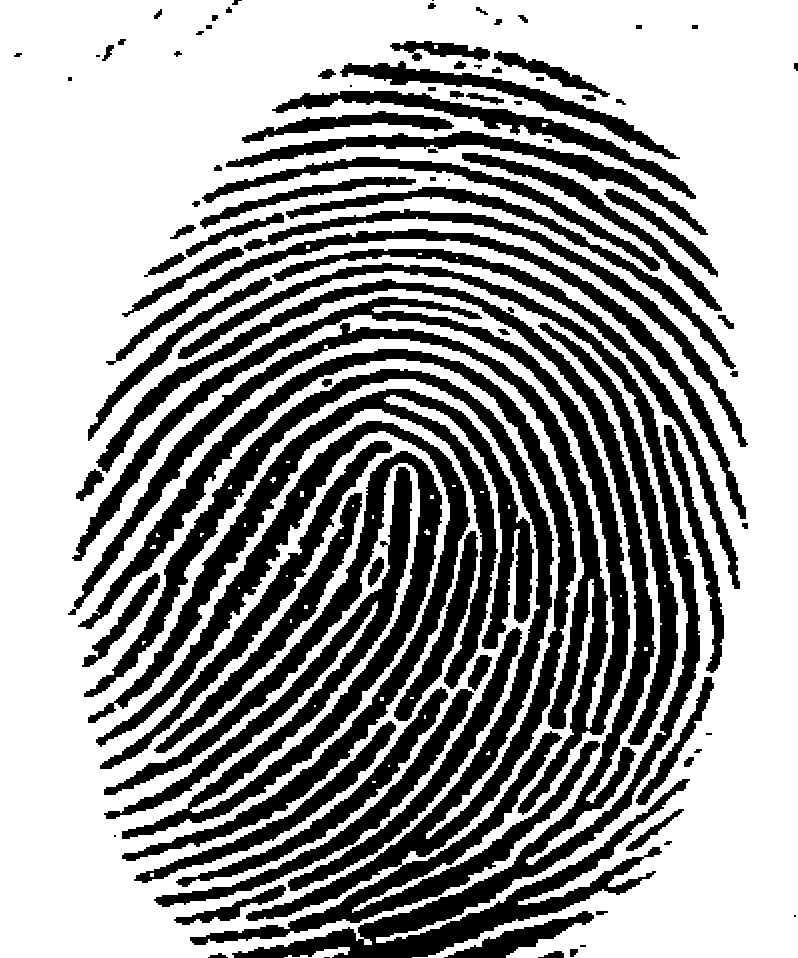

In [ ]:
def global_thresh(img,delta):
  t=np.mean(img)
  while True:
    g1=img>t
    g2=img<=t
    m1=np.mean(img[g1])
    m2=np.mean(img[g2])

    new_t=(m1+m2)/2.0
    if abs(t-new_t)<delta:
      break

    t=new_t
    thresh_img=(img>t).astype('uint8')*255
  return thresh_img

img=cv2.imread("/content/thresh_img.bmp")
delta=0.01
output=global_thresh(img,delta)
cv2_imshow(img)
cv2_imshow(output)